# Unsupervised Learning Final Project

## Problem Statement

As a wine store owner, I'd love to be able to help my customers find similar wines they might like and to find high-quality wines with the chemical profile similar to wines they like.

To do this, I'll use KMeans clustering to find wine profiles. I can use those flavor profiles to help customers find similar wines. The dataset also has a quality rating for each wine. I won't include that in the clustering - I want to find the highest quality wines in each flavor profile to find values and representative examples.

Data available here: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset/data

## Initial Setup, Scaling, and Cluster Fitting

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
wine = pd.read_csv('WineQT.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [51]:
wine.shape

(1143, 13)

In [49]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


The variables certainly have a wide range of scales - the acidity variables don't exceed a value of 2 while the total sulfur dioxide variable is centered at ~45. The variables will certainly need to be scaled before any clustering is performed.

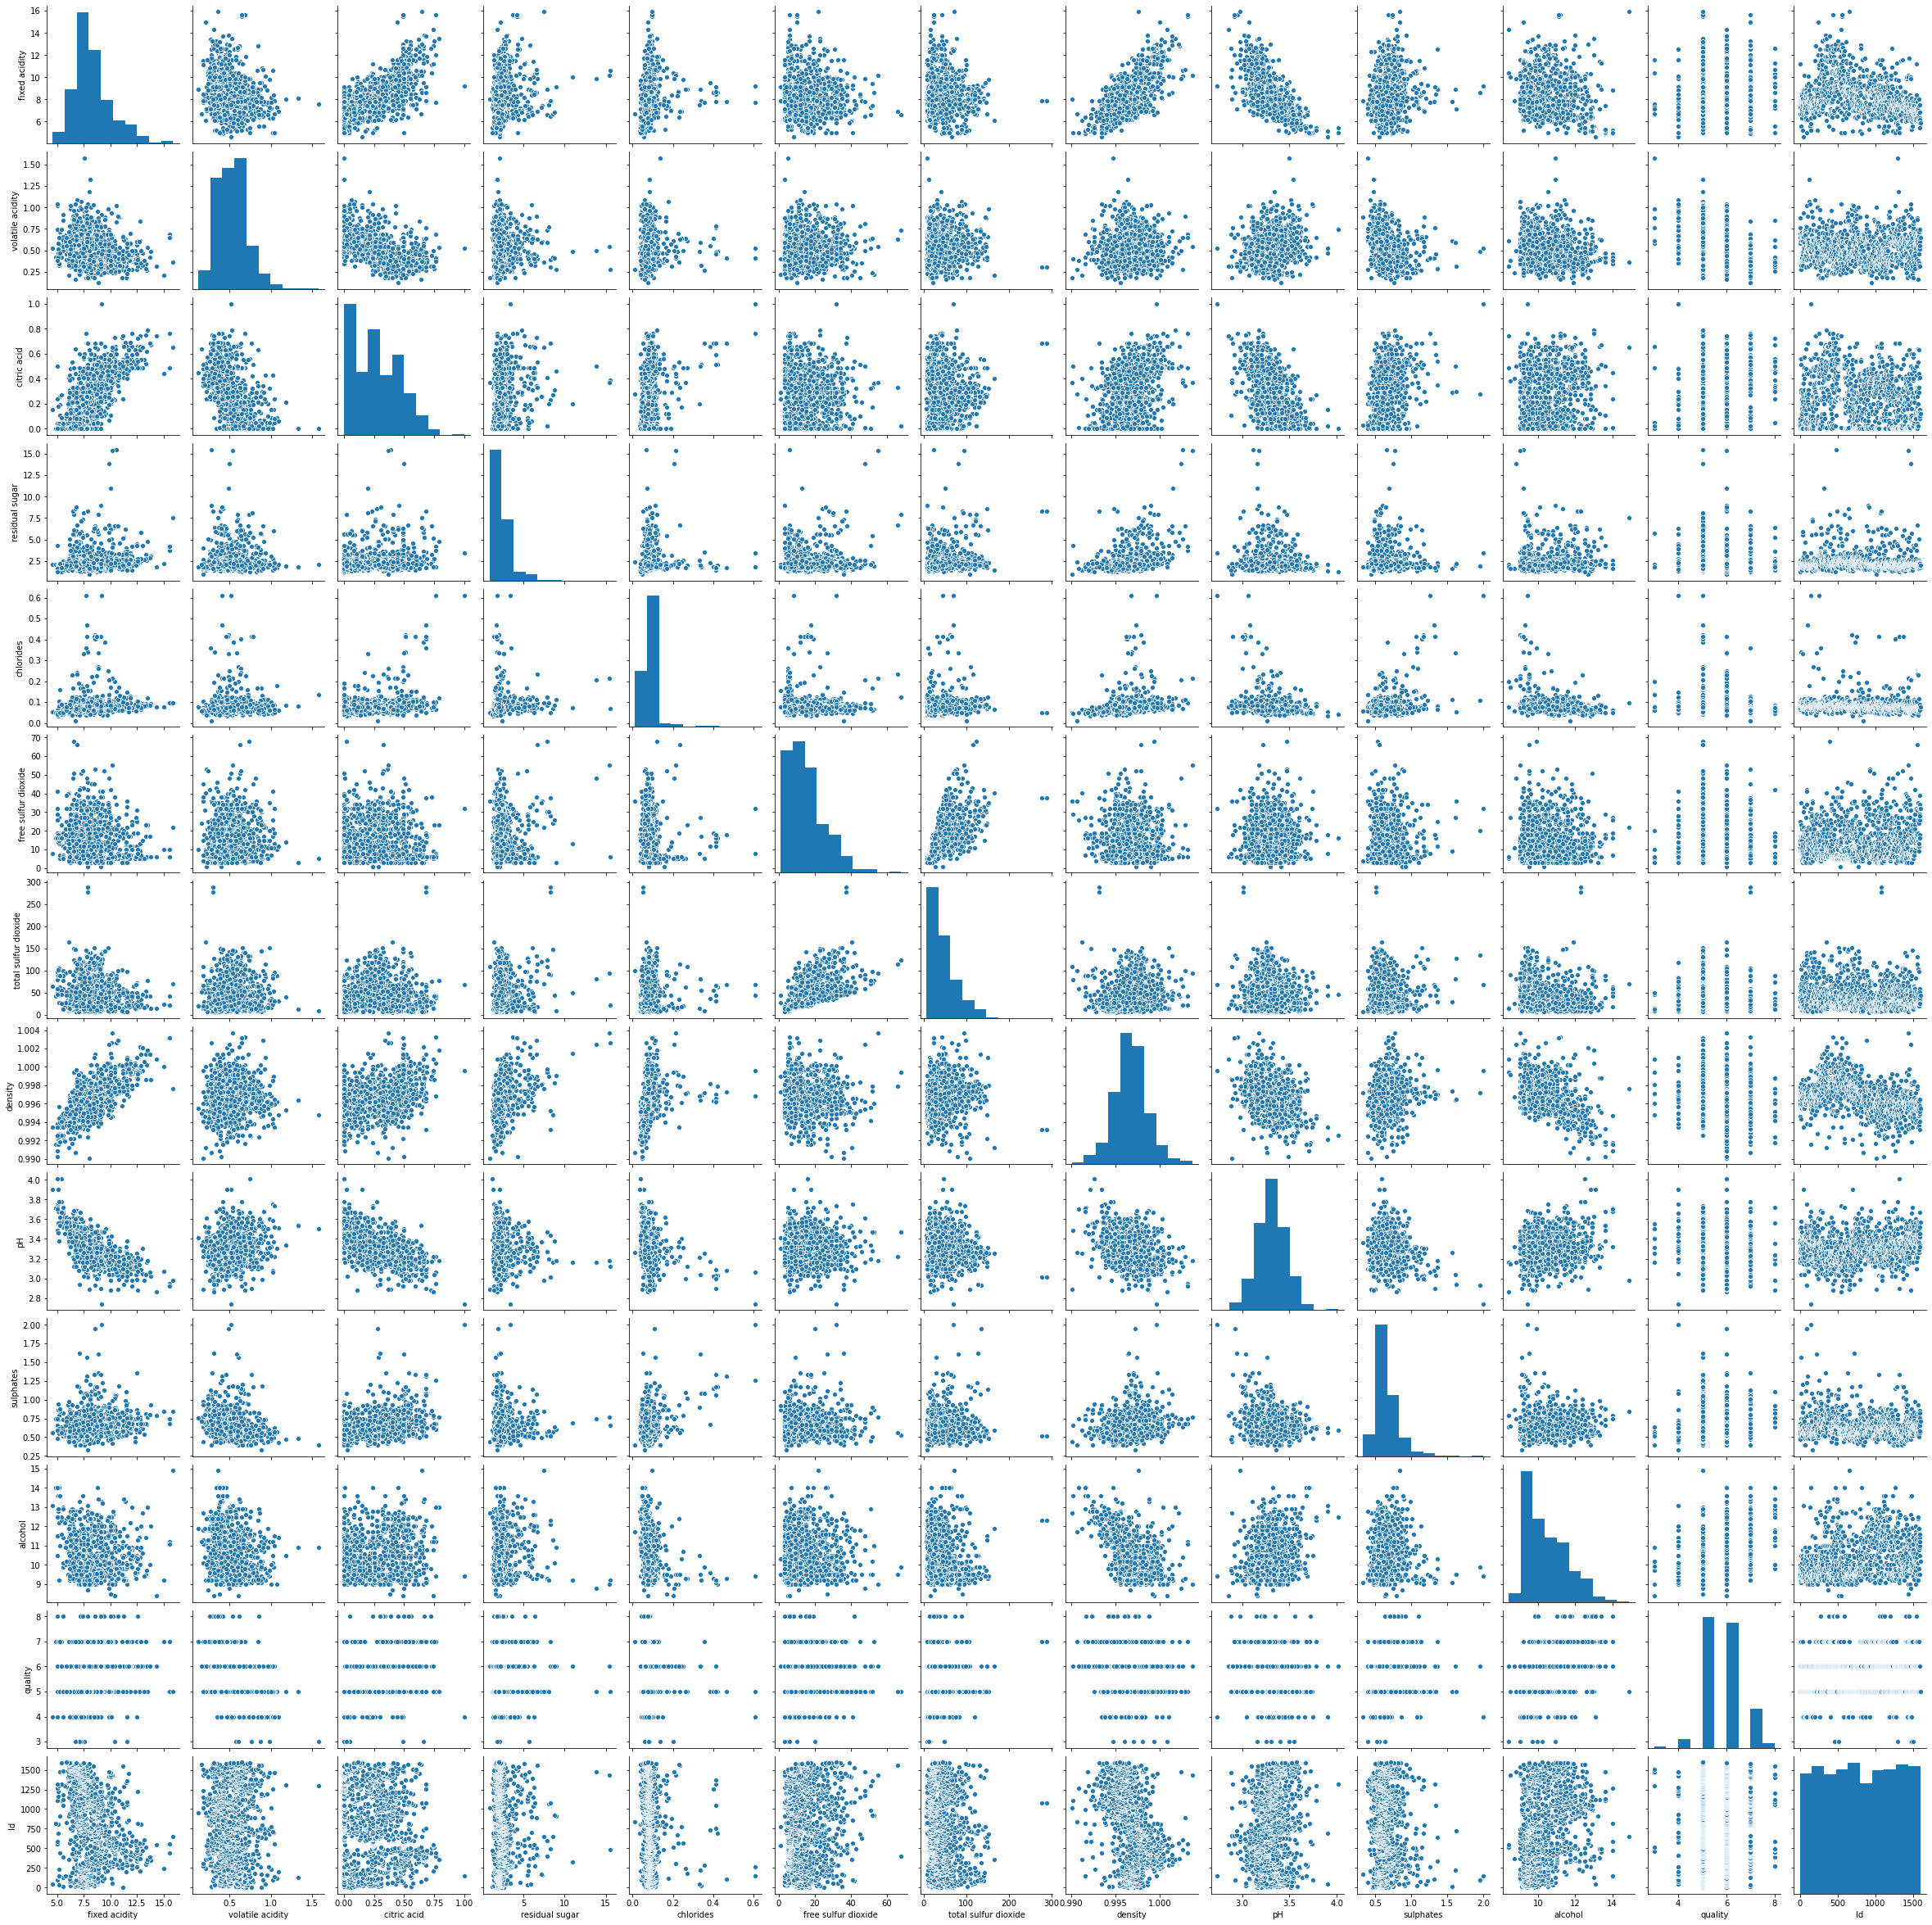

In [50]:
sns.pairplot(wine)

The quality variable is always an integer and could even be treated as a categorical variable (It's similar to a star rating). From the pair plot, the strongest positive correlations that I see are fixed acidty - density, residual sugar - density, and free sulfur dioxide - total sulfur dioxide. The strongest negative correlations are fixed acidity - pH and density - alcohol.

In [4]:
input_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
             'sulphates', 'alcohol']

In [5]:
scaler = StandardScaler()

# Fit and transform the selected columns
wine[input_cols] = scaler.fit_transform(wine[input_cols])

# Apply clustering algorithm (e.g., KMeans)
kmeans = KMeans(n_clusters=2, random_state=17, n_init=10)
wine['cluster'] = kmeans.fit_predict(wine[input_cols])

In [15]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,cluster
0,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,5,0,1
1,-0.292593,1.941813,-1.365027,0.050060,0.234247,0.915920,0.643477,0.036165,-0.708928,0.130881,-0.593601,5,1,1
2,-0.292593,1.273492,-1.161568,-0.171289,0.107253,-0.060071,0.246745,0.140103,-0.325775,-0.045254,-0.593601,5,2,1
3,1.653789,-1.399789,1.483400,-0.466421,-0.252560,0.135127,0.429852,0.659792,-0.964363,-0.456235,-0.593601,6,3,0
4,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,5,4,1


Looks good in its most basic form, let's find the best number of clusters based on inertia, distortion, and silhouette scores.

## KMeans Metric Evaluation and Optimum Cluster Number

In [42]:
inertia_values = []
sil_scores = []
distortion_values = []
for i in range(2,11):
    #print(f"Number of clusters: {i}")
    kmeans = KMeans(n_clusters=i, random_state=17, n_init=25, init='k-means++')
    kmeans.fit_predict(wine[input_cols])
    inertia = kmeans.inertia_
    inertia_values.append(inertia)
    #print(f"Inertia: {inertia}")

    # Silhouette Score
    labels = kmeans.labels_
    silhouette = silhouette_score(wine[input_cols], labels)
    sil_scores.append(silhouette)
    #print(f"Silhouette Score: {silhouette}")
    
    #Distortion
    dist = sum(np.min(cdist(wine[input_cols], kmeans.cluster_centers_, 'euclidean'), axis=1)**2) / wine[input_cols].shape[0]
    distortion_values.append(dist)

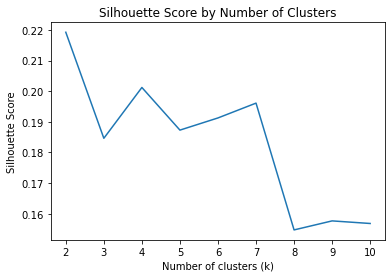

In [43]:
plt.plot(range(2, 11), sil_scores)
plt.title('Silhouette Score by Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

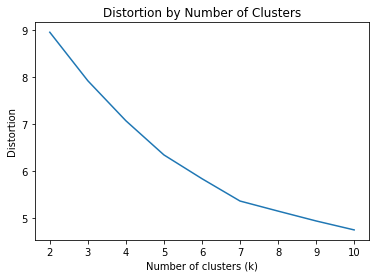

In [44]:
plt.plot(range(2, 11), distortion_values)
plt.title('Distortion by Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.show()

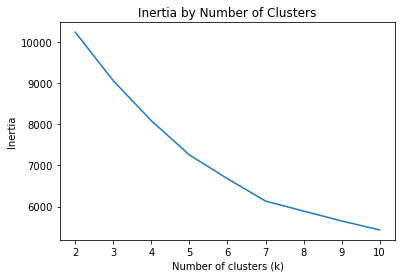

In [45]:
plt.plot(range(2, 11), inertia_values)
plt.title('Inertia by Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

The Inertia and Distortion plots don't show an obvious elbow point that we can use to determine the best number of clusters but each plot does bend somewhat at seven. Additionally, seven is the highest number of clusters that maintains a silhouette score of approximately 0.2. Seven Certainly seems like the best choice for number of clusters.

A silhouette score of 0.2 tells us that these clusters are far from optimal but still have some ability to group our wines.

In [24]:
kmeans = KMeans(n_clusters=7, random_state=17, n_init=25, init='k-means++')
wine['cluster'] = kmeans.fit_predict(wine[input_cols])

## Understanding the Clusters

I'd like to better understand each cluster and the chemical profile it represents. Let's take a look at the mean values across our variables to get a sense of what each cluster represents.

In [26]:
input_cols.append('quality')

In [29]:
wine.groupby('cluster')[input_cols].mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,-0.409071,0.574652,-0.763195,-0.226676,-0.061450,-0.470247,-0.425866,-0.022152,0.281650,-0.351806,-0.469642,5.400000
1,-1.170984,0.480864,-0.969502,-0.241531,-0.446098,0.422459,-0.053305,-1.382381,1.352434,-0.178177,1.280571,5.824000
2,0.010259,-0.026319,0.487435,4.234275,0.330516,1.762828,1.897659,1.127848,-0.331955,0.079745,-0.316266,5.483871
3,0.099093,0.021857,1.464660,-0.369338,6.062562,0.027255,0.551923,0.186054,-1.771000,3.650486,-0.929323,5.421053
4,-0.093711,0.080046,0.024327,-0.107206,-0.042730,0.950206,1.199702,0.201569,-0.118509,-0.244164,-0.587358,5.314655
5,1.715125,-0.615033,1.264290,0.199045,0.061550,-0.515891,-0.453151,1.156981,-1.001204,0.276047,-0.006083,5.901099
6,0.040012,-1.015847,0.719007,-0.113994,-0.267695,-0.325060,-0.552002,-0.640942,-0.117431,0.495942,1.010504,6.329609


Quality wasn't included in the clustering intentionally - I wanted to create flavor profiles independent of quality. It's interesting to see the spread in mean quality of each cluster - clusters 1, 5, and 6 ceratainly stand out on the high end.

Here's my summary of each cluster and what it represents.

- 0 - Moderately low alcohol, low fixed and citric acid
- 1 - High pH and alcohol, low fixed acidity and density
- 2 - Very high residual sugar and high total and free sulfur dioxide
- 3 - Very high sulphates and high citric acid, low alcohol
- 4 - High free and total sulfur dioxide, moderately low alcohol
- 5 - Very high fixed acidity, high density, and low pH
- 6 - High alcohol and low volatile acidity

Another motivation for this analysis was being able to reccomend high quality wines in each chemical profile. Below, I get the three highest-quality wines for each cluster. This may even inform my buying decisions in the future!

In [40]:
# Get top 3 values per category
def top_three(df, column, n=3):
    return df.nlargest(n, column)

top_3_per_group = wine.groupby('cluster').apply(top_three, column='quality')

top_3_per_group = top_3_per_group.reset_index(drop=True)

top_3_per_group

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,cluster
0,-0.578826,0.660865,-1.365027,-0.982903,-0.464216,-0.060071,-0.760341,-1.107153,0.504389,-1.102062,-0.408711,7,7,0
1,-0.292593,0.271012,-1.263297,-0.392638,-0.294891,-0.645665,-0.851895,0.036165,0.312813,-0.514946,-0.870937,7,8,0
2,-0.178100,0.326705,-0.551191,-0.540205,-0.464216,-1.231259,-0.912930,-0.275649,0.695966,1.539959,0.053515,7,128,0
3,-1.552017,1.774733,-1.110703,-0.835337,-0.887526,-0.352868,1.284350,-2.250470,1.589989,0.952843,2.272200,8,390,1
4,-1.895497,-0.620082,-0.144273,-0.392638,-0.570043,0.330325,0.124674,-2.614253,2.611730,0.483151,3.289097,8,588,1
5,-1.781004,-0.285922,-1.161568,-0.687771,-0.697036,0.330325,1.833670,-2.094564,1.462271,-0.221388,1.625083,7,230,1
6,1.195817,-0.508695,2.348100,2.964492,-0.273726,2.184707,0.918137,1.179482,-0.900504,1.128978,1.440193,7,501,2
7,1.195817,-0.508695,2.348100,2.964492,-0.273726,2.184707,0.918137,1.179482,-0.900504,1.128978,1.440193,7,502,2
8,-0.235347,-1.288402,2.093777,4.255696,-0.781698,2.135908,7.082727,-1.855506,-1.922245,-0.867216,1.717529,7,1079,2
9,-0.349840,-1.455483,2.093777,0.714108,5.737281,-1.036061,-1.096037,0.244041,-0.389634,2.479344,-0.501156,7,281,3


## PCA Analysis to Facilitate Visualization

I'd like to visually inspect these clusters to better understand how they relate to each other but it's difficult to do that across all the variables. Here, I reduce down to two principal components in order to visualize the clusters.

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
input_cols.pop()

X_viz = pca.fit_transform(wine[input_cols])

explained_variance = pca.explained_variance_ratio_

In [31]:
explained_variance

array([0.28692345, 0.17075104])

These two components explain roughly 50% of the variance in the dataset. Not ideal, but enough to be informative.

In [33]:
X_viz

array([[-1.56154478,  0.44489171],
       [-0.76089236,  1.91505819],
       [-0.70808539,  0.91442316],
       ...,
       [-2.12463519,  0.87380431],
       [-2.20853569,  0.92834262],
       [-2.24173343,  1.00318928]])

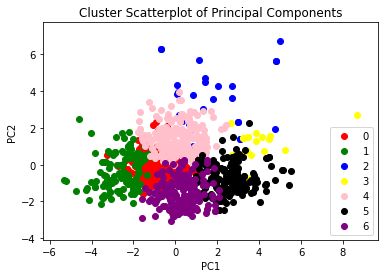

In [46]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_viz, wine['cluster']
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                               stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1,
                               stop=X_set[:, 1].max() + 1, step=0.01))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('red', 'green', 'blue', 'yellow', 'pink', 'black', 'purple'))(i), label=j)

plt.title('Cluster Scatterplot of Principal Components')
plt.xlabel('PC1')  # for Xlabel
plt.ylabel('PC2')  # for Ylabel
plt.legend()  # to show legend

# show scatter plot
plt.show()

This visual certainly aligns with the modest silhouette score for this clustering analysis. It could also be valuable in coming up with additional recommendations for customers. Clusters 0-1, 0-4, and 5-6 have large overlapping regions in this visual so a person who is a fan of one of those may want to try wines from the other cluster.

Text(0, 0.5, 'cumulative explained variance')

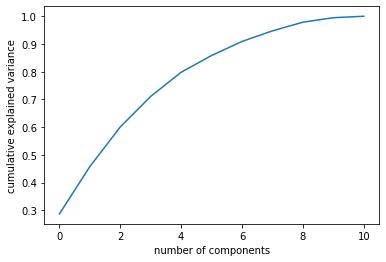

In [35]:
pca = PCA().fit(wine[input_cols])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Out of curiosity, I wanted to see the cumulative variance explained for various numbers of components. Looks like this dataset could be really well represented with six principal components, capturing ~90% of variance.

## Hierarchical Clustering

I'm curious to see if the number of clusters identified matches between KMeans and hierarchical approaches.

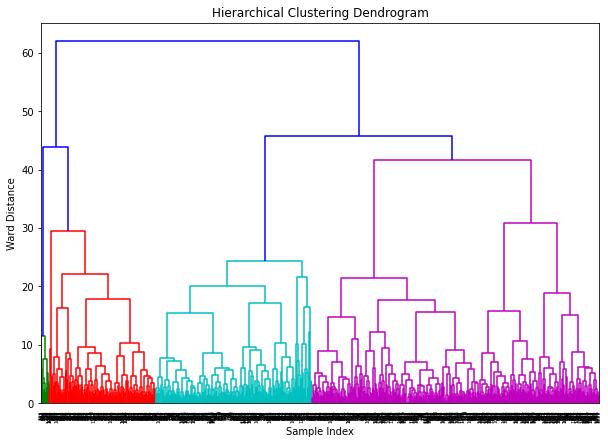

In [6]:
linked = linkage(wine[input_cols], 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Ward Distance')
plt.show()

Cutting the dendogram at approximately 35 would lead to 5 clusters using the ward distance method.

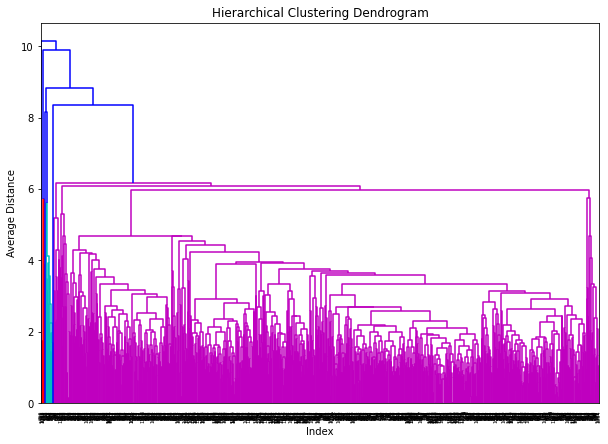

In [8]:
linked = linkage(wine[input_cols], 'average')

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Average Distance')
plt.show()

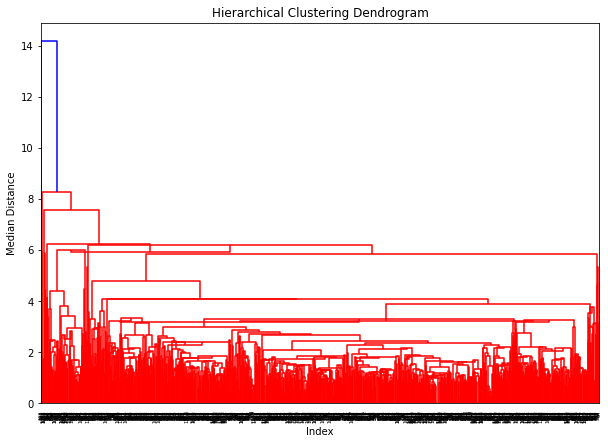

In [12]:
linked = linkage(wine[input_cols], 'median')

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Median Distance')
plt.show()

The ward distance method is the only one that seems to make sense for this data. Both of the other two distance metrics resulted in extremely messy cluster dendograms being created.

This hierarchical approach shows that this data isn't a great fit for unsupervised approaches even if it brings some value. Some domain knowledge around which of these chemical properties most impacts taste seems like the next best thing to incorporate. If we trimmed or combined variables based on that, we may get to a place where this analysis is more useful. 